<a href="https://colab.research.google.com/github/raianegoncalves/back-end-python/blob/main/Desafio_Individual_Regressao_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv('desafio_01_preco_imoveis.csv')

1. Calcular a correlação com o preço

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# Remover as colunas 'date' e 'zipcode'
df = df.drop(columns=['date', 'zipcode'])

# Calcular a correlação de todas as variáveis com o preço
correlacao = df.corr()['price'].sort_values(ascending=False)

# Exibir as variáveis mais e menos correlacionadas com o preço
print("Variáveis mais correlacionadas com o preço:")
print(correlacao.head(6))  # Incluindo o preço em si para contexto

print("\nVariáveis menos correlacionadas com o preço:")
print(correlacao.tail(5))

Variáveis mais correlacionadas com o preço:
price          1.000000
sqft_living    0.702035
grade          0.667434
sqft_above     0.605567
bathrooms      0.525138
view           0.397293
Name: price, dtype: float64

Variáveis menos correlacionadas com o preço:
sqft_lot     0.089661
yr_built     0.054012
condition    0.036362
long         0.021626
id          -0.016762
Name: price, dtype: float64


2. Analisar as top 5 variáveis mais correlacionadas

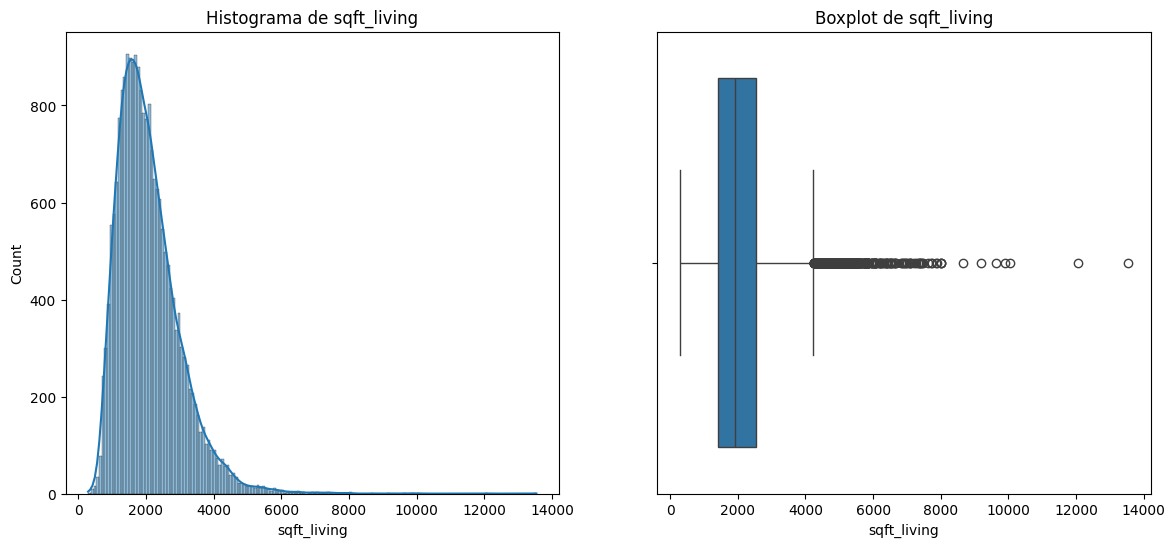

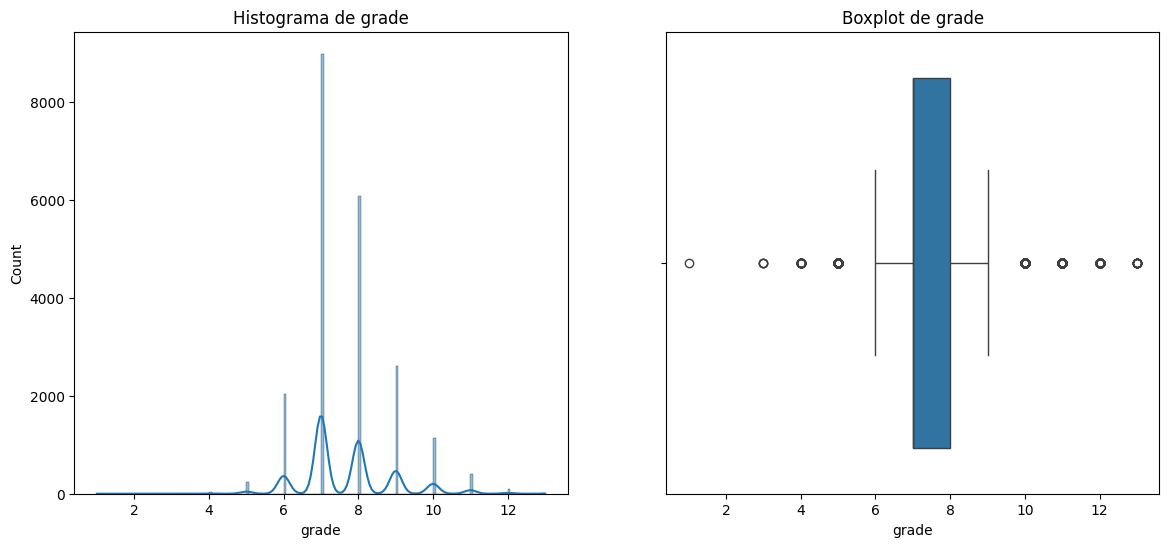

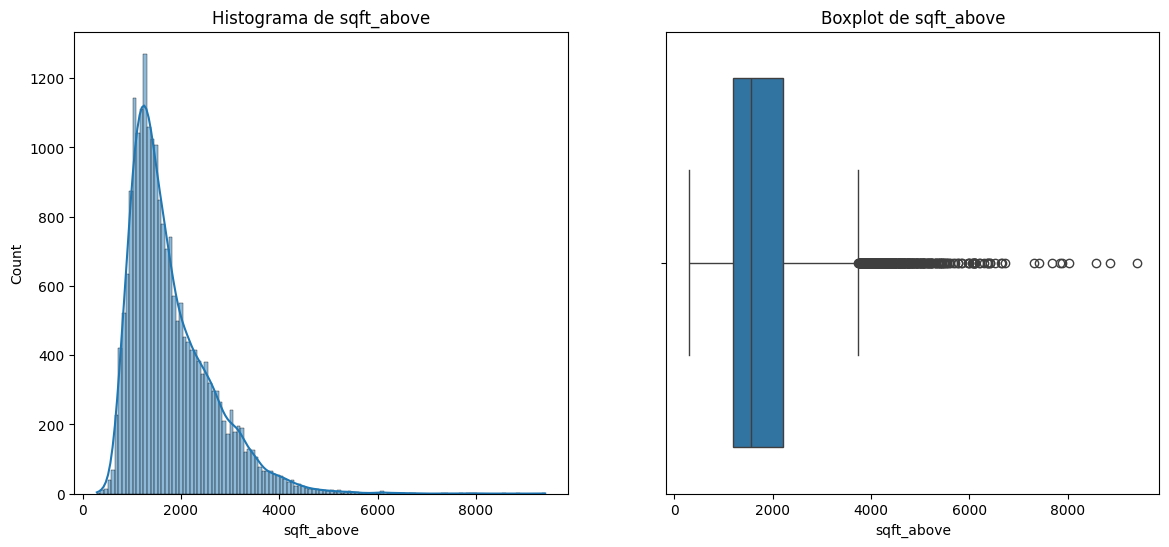

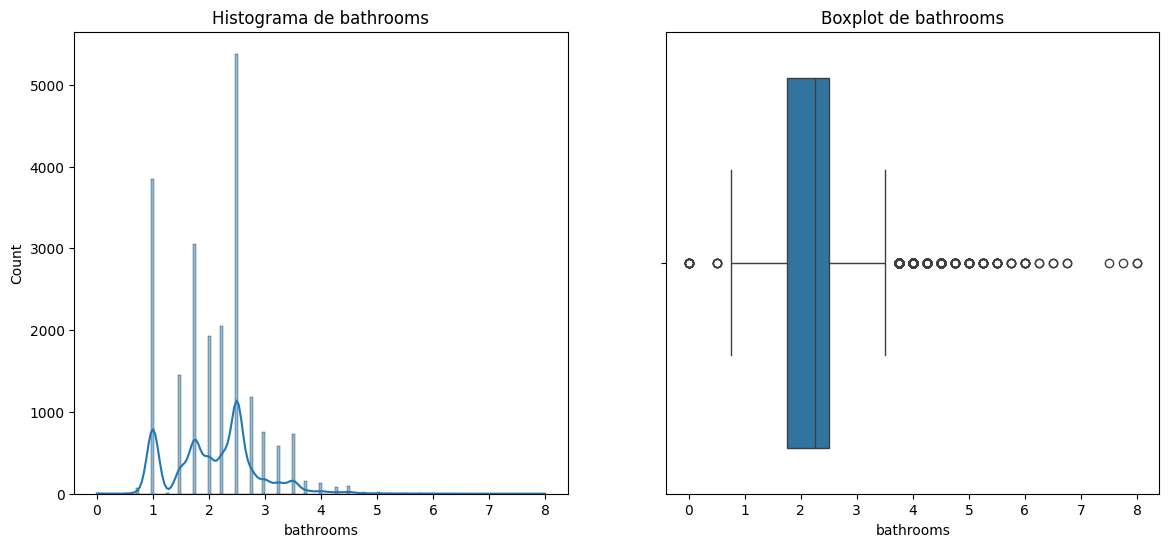

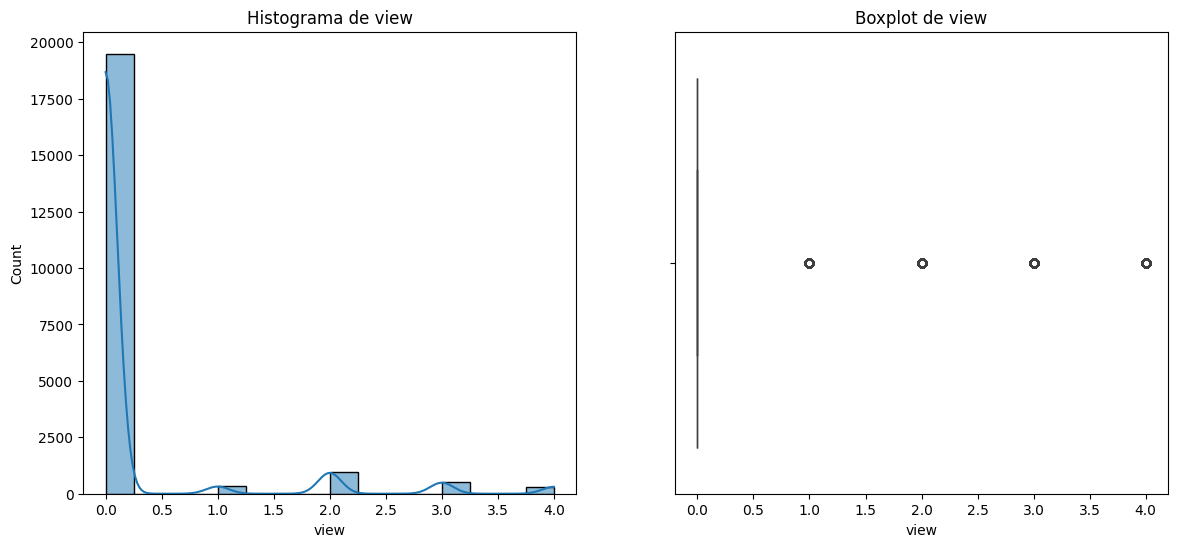

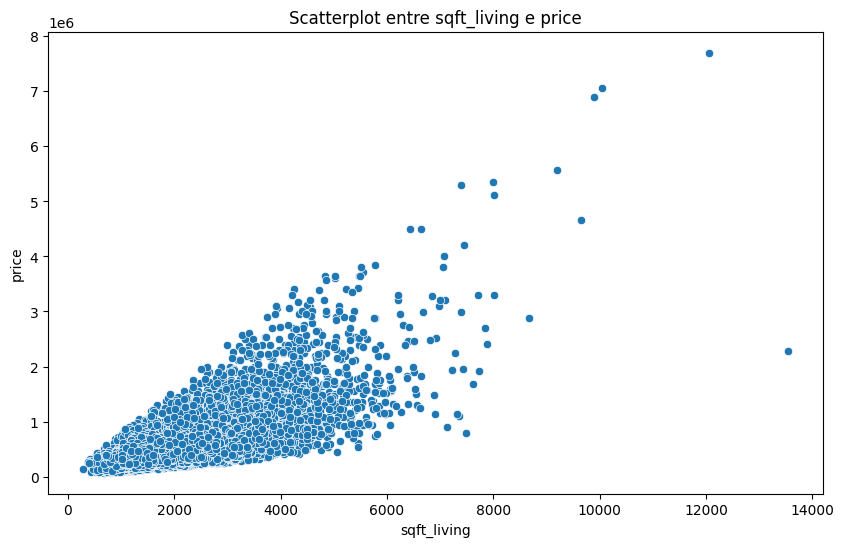

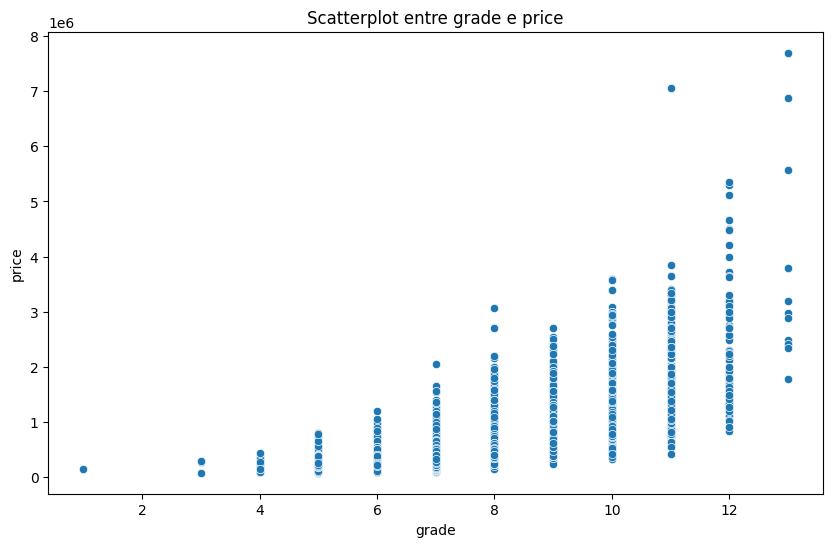

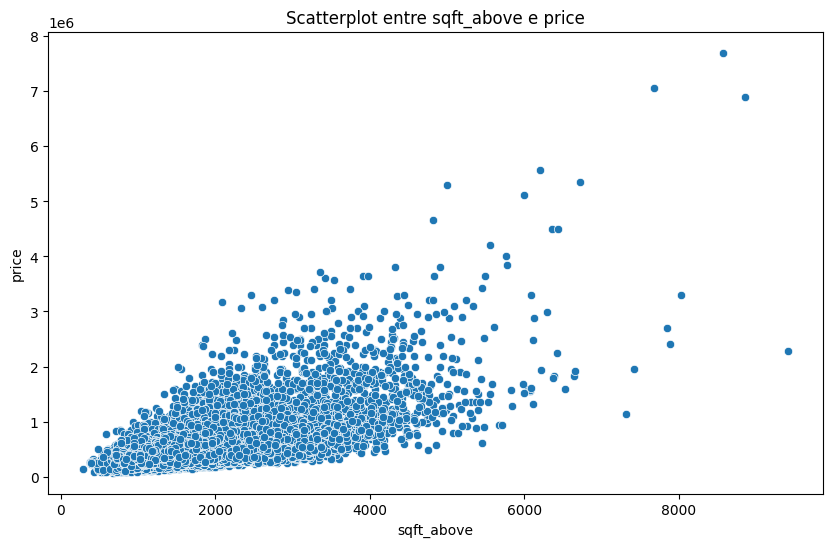

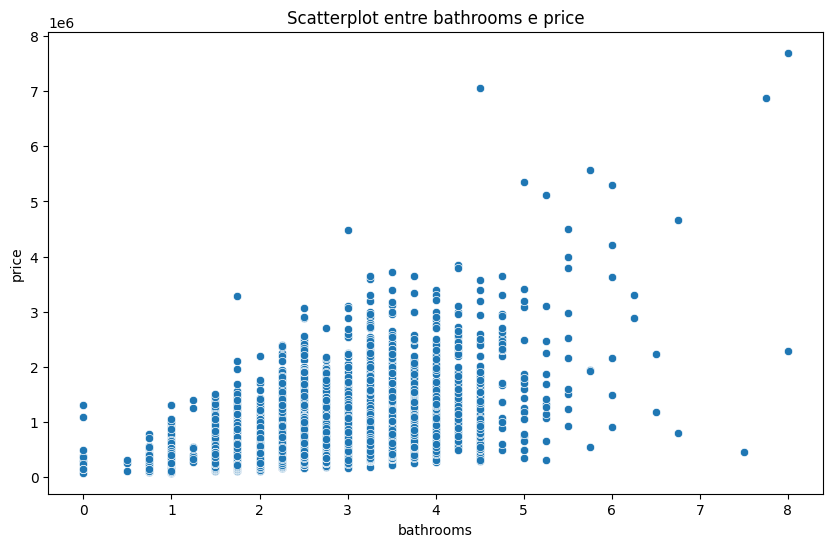

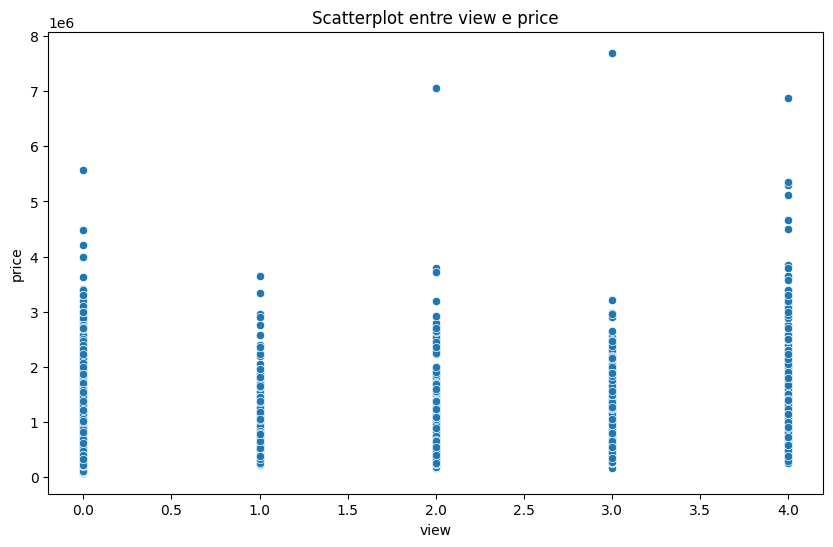

In [8]:
# Selecionar as 5 variáveis mais correlacionadas (excluindo 'price')
top_5_vars = correlacao.index[1:6]

# Plotar histogramas e boxplots para cada variável
for var in top_5_vars:
    plt.figure(figsize=(14, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')

    plt.show()

# Plotar scatterplot de cada variável com preço
for var in top_5_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[var], y=df['price'])
    plt.title(f'Scatterplot entre {var} e price')
    plt.xlabel(var)
    plt.ylabel('price')
    plt.show()

3. Regressão Linear Simples para cada uma das top 5 variáveis

In [9]:
# Função para realizar regressão linear simples
def regressao_linear_simples(df, var_independente, var_resposta='price'):
    X = df[[var_independente]]
    y = df[var_resposta]

    # Adicionar constante para o intercepto
    X = sm.add_constant(X)

    # Ajustar o modelo
    modelo = sm.OLS(y, X).fit()

    # Exibir o resumo da regressão
    print(f'Regressão Linear para {var_independente}')
    print(modelo.summary())
    print("\n")

# Aplicar a regressão para cada variável
for var in top_5_vars:
    regressao_linear_simples(df, var)

Regressão Linear para sqft_living
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:29:55   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.3